# Random Forest

Random Forest adalah sebuah algoritma pembelajaran ensemble yang digunakan untuk masalah klasifikasi dan regresi dalam machine learning. Ensemble learning melibatkan penggabungan prediksi dari beberapa model untuk meningkatkan kinerja dan kestabilan keseluruhan. Random Forest adalah bentuk khusus dari ensemble learning yang menggunakan sekumpulan pohon keputusan untuk membuat prediksi.

Di latihan ini, kita akan menggunakan Random Forest untuk mengklasifikasikan kasus stunting, salah satu dataset standar yang cukup mudah diklasifikasikan.

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import openpyxl
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score

##Memanggil Data#

In [2]:
data = pd.read_excel('data_tigaraksa.xlsx')
data

,NIK,Nama,JK,Usia,Berat,Tinggi,BB/U,ZS BB/U,TB/U,ZS TB/U,ZS BB/TB,Status Gizi
0,3603201405216230,ADIT,L,26,9.0,86.0,Kurang,-2.97,Normal,-1.04,-3.58,Gizi Buruk
1,3603203005214872,AKSA NUGRAHA,L,26,12.0,88.0,Berat Badan Normal,-0.40,Normal,-0.28,-0.42,Gizi Baik
2,3603036502990005,DEWINA,P,15,8.5,70.0,Berat Badan Normal,-1.11,Pendek,-2.94,0.44,Gizi Baik
3,3603206206187666,DINDA,P,49,13.0,97.0,Berat Badan Normal,-1.68,Normal,-1.48,-1.16,Gizi Baik
4,3603204112182485,EKA AULIA PUTRI,P,56,13.0,91.0,Kurang,-2.16,Sangat Pendek,-3.54,0.09,Gizi Baik
...,...,...,...,...,...,...,...,...,...,...,...,...
4971,3603200603221736,UBAID,L,17,9.0,77.5,Berat Badan Normal,-1.69,Normal,-1.64,-1.28,Gizi Baik
4972,3603206409182637,UNA,P,59,15.0,105.0,Berat Badan Normal,-1.29,Normal,-0.83,-1.24,Gizi Baik
4973,3603205611184270,YURA,P,57,14.7,102.0,Berat Badan Normal,-1.33,Normal,-1.28,-0.81,Gizi Baik
4974,3603201802212826,ZAHDAR,L,30,12.7,88.5,Berat Badan Normal,-0.41,Normal,-1.04,0.17,Gizi Baik


## Data Cleaning

In [3]:
# Get Location Index data
def get_index(element):
    return data.columns.get_loc(element)

In [4]:
data.columns

Index(['NIK', 'Nama', 'JK', 'Usia', 'Berat', 'Tinggi', 'BB/U', 'ZS BB/U',
       'TB/U', 'ZS TB/U', 'ZS BB/TB', 'Status Gizi'],
      dtype='object')

In [5]:

feature = data.iloc[:, [  get_index(
    "Berat"), get_index("Tinggi"), get_index("Usia"), get_index("JK"), get_index("Status Gizi")]]


# # Mentranformsikan Label ['Laki - Laki' : 0, 'Perempuan' : 1]
feature["JK"] = feature["JK"].astype("category")
feature["JK"] = LabelEncoder().fit_transform(feature["JK"])

# # Mentranformsikan Label ['Gizi Baik' : 0, 'Gizi Buruk' : 1, 'Gizi Kurang':2, 'Gizi Lebih': 3, 'Obesitas': 4, 'Risiko Gizi Lebih': 5]
feature["Status Gizi"] = feature["Status Gizi"].astype("category")
feature["Status Gizi"] = LabelEncoder().fit_transform(feature["Status Gizi"])

feature.head()
feature.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4976 entries, 0 to 4975
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Berat        4976 non-null   float64
 1   Tinggi       4976 non-null   float64
 2   Usia         4976 non-null   int64  
 3   JK           4976 non-null   int32  
 4   Status Gizi  4976 non-null   int32  
dtypes: float64(2), int32(2), int64(1)
memory usage: 155.6 KB


C:\Users\ELSANDE\AppData\Local\Temp\ipykernel_58884\2768008689.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature["JK"] = feature["JK"].astype("category")
C:\Users\ELSANDE\AppData\Local\Temp\ipykernel_58884\2768008689.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature["JK"] = LabelEncoder().fit_transform(feature["JK"])
C:\Users\ELSANDE\AppData\Local\Temp\ipykernel_58884\2768008689.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [6]:
feature.head()

,Berat,Tinggi,Usia,JK,Status Gizi
0,9.0,86.0,26,0,1
1,12.0,88.0,26,0,0
2,8.5,70.0,15,1,0
3,13.0,97.0,49,1,0
4,13.0,91.0,56,1,0


## Check Missing Value

In [7]:
np.sum(pd.isnull(feature).sum()) # Sum of the count of null objects in all columns of data frame

0

In [8]:
#ceck missing value pada setiap kolom
print(feature.isnull().sum())

Berat          0
Tinggi         0
Usia           0
JK             0
Status Gizi    0
dtype: int64


**Menampilkan statistik deskriptif dari data, perhatikan bagaimana data menyebar, nilai minimum, maksimum, rata-rata, simpangan baku, dan apakah data hanya berkumpul pada rentang kuartil tertentu. Hal ini penting untuk kita lakukan preprocessing berikutnya**

In [9]:
feature.describe()

,Berat,Tinggi,Usia,JK,Status Gizi
count,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000
mean,13.239166,92.482602,37.952572,0.442122,1.079381
std,2.731062,10.805580,14.247650,0.496689,1.940090
min,4.600000,13.500000,1.000000,0.000000,0.000000
25%,11.700000,86.000000,28.000000,0.000000,0.000000
50%,13.600000,94.500000,40.000000,0.000000,0.000000
75%,14.800000,100.600000,50.000000,1.000000,1.000000
max,32.000000,121.000000,59.000000,1.000000,5.000000


Normalization Data Use Min Max (dengan teknik Min Max Scaling)

In [10]:
label = feature["Status Gizi"]
feature_1 = feature.drop(columns=['Status Gizi'])
feature_1.head()

,Berat,Tinggi,Usia,JK
0,9.0,86.0,26,0
1,12.0,88.0,26,0
2,8.5,70.0,15,1
3,13.0,97.0,49,1
4,13.0,91.0,56,1


## Normalization Min-Max Scalable

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_norm = scaler.fit_transform(feature_1)
feature_norm = pd.DataFrame(feature_norm, columns=feature_1.columns)
feature_norm

,Berat,Tinggi,Usia,JK
0,0.160584,0.674419,0.431034,0.0
1,0.270073,0.693023,0.431034,0.0
2,0.142336,0.525581,0.241379,1.0
3,0.306569,0.776744,0.827586,1.0
4,0.306569,0.720930,0.948276,1.0
...,...,...,...,...
4971,0.160584,0.595349,0.275862,0.0
4972,0.379562,0.851163,1.000000,1.0
4973,0.368613,0.823256,0.965517,1.0
4974,0.295620,0.697674,0.500000,0.0


In [12]:
feature_norm["Status Gizi"] = label
feature_norm

,Berat,Tinggi,Usia,JK,Status Gizi
0,0.160584,0.674419,0.431034,0.0,1
1,0.270073,0.693023,0.431034,0.0,0
2,0.142336,0.525581,0.241379,1.0,0
3,0.306569,0.776744,0.827586,1.0,0
4,0.306569,0.720930,0.948276,1.0,0
...,...,...,...,...,...
4971,0.160584,0.595349,0.275862,0.0,0
4972,0.379562,0.851163,1.000000,1.0,0
4973,0.368613,0.823256,0.965517,1.0,0
4974,0.295620,0.697674,0.500000,0.0,0


**Apakah data kita imbalaned?**

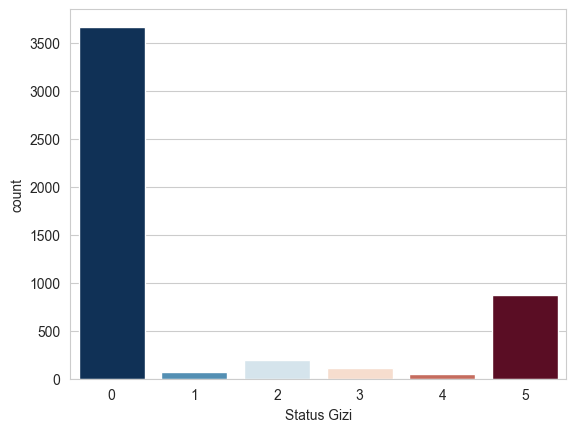

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Status Gizi', data=feature_norm, hue='Status Gizi', palette='RdBu_r', legend=False)
plt.show()

## Handling Imbalanced With SMOTE

In [14]:
from imblearn.over_sampling import SMOTE
from collections import Counter


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(feature_norm.drop(columns=['Status Gizi'])
, feature_norm['Status Gizi'])
print("Jumlah sampel per kelas setelah SMOTE:", Counter(y_resampled))

Jumlah sampel per kelas setelah SMOTE: Counter({1: 3671, 0: 3671, 2: 3671, 5: 3671, 3: 3671, 4: 3671})


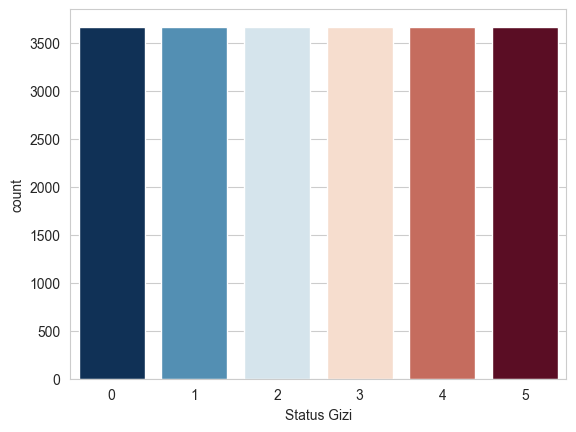

In [15]:
X_resampled.columns[0:10]

X_resampled['Status Gizi']= y_resampled

sns.set_style('whitegrid')
sns.countplot(x='Status Gizi', hue='Status Gizi', data=X_resampled, palette='RdBu_r', legend=False)
plt.show()

**Pemeriksaan sebaran nilai data pada tiap atribut/variabel untuk masing-masing kelas dengan box-plot. Dengan melihat apakah ada perbedaan sebaran nilai yang mencolok, kita bisa mendapatkan gambaran, atribut/variabel manakah yang secara umum kita duga bisa menjadi pembeda utama antara 6 kelas.**

C:\Users\ELSANDE\AppData\Local\Temp\ipykernel_58884\4156277062.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status Gizi',y=l[i], data=feature, palette='winter')
C:\Users\ELSANDE\AppData\Local\Temp\ipykernel_58884\4156277062.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status Gizi',y=l[i], data=feature, palette='winter')
C:\Users\ELSANDE\AppData\Local\Temp\ipykernel_58884\4156277062.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status Gizi',y=l[i], data=feature, palette='winter')
C:\Users\ELSANDE\AppData\Local\Tem

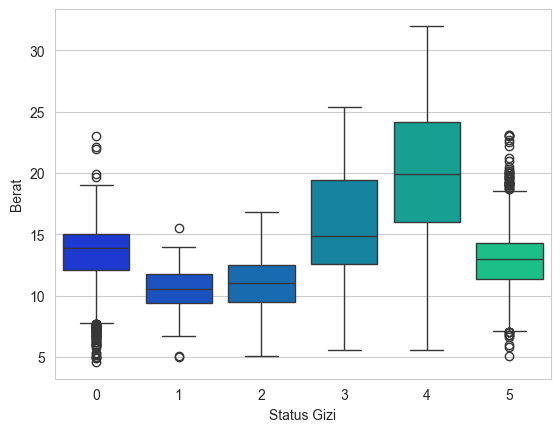

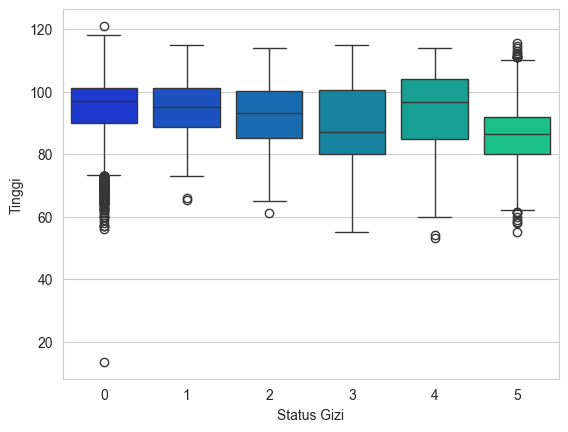

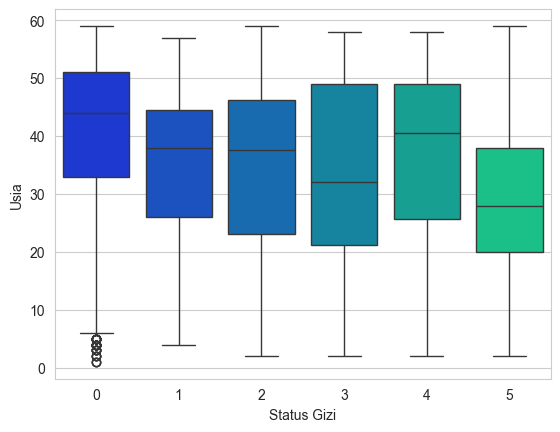

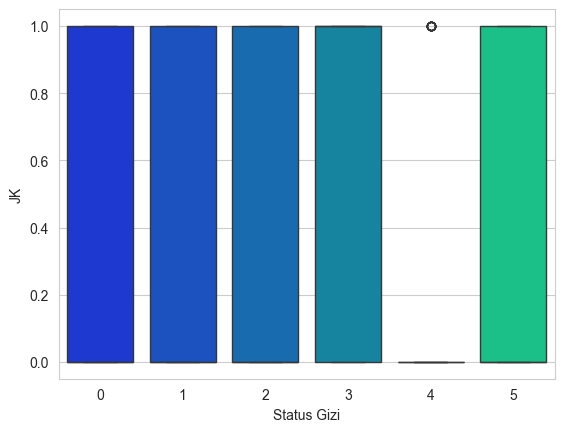

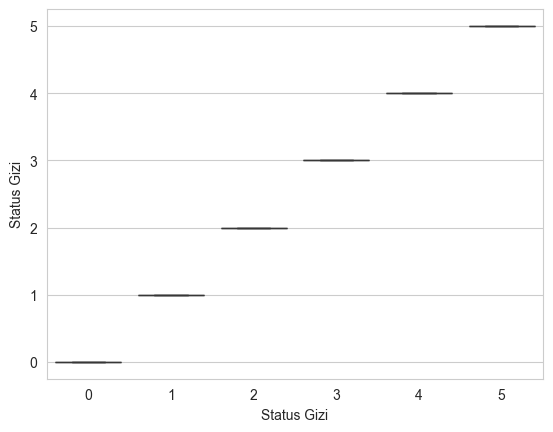

<Figure size 640x480 with 0 Axes>

In [16]:
l=list(feature.columns[0:10])
for i in range(len(l)):
    sns.boxplot(x='Status Gizi',y=l[i], data=feature, palette='winter')
    plt.figure()

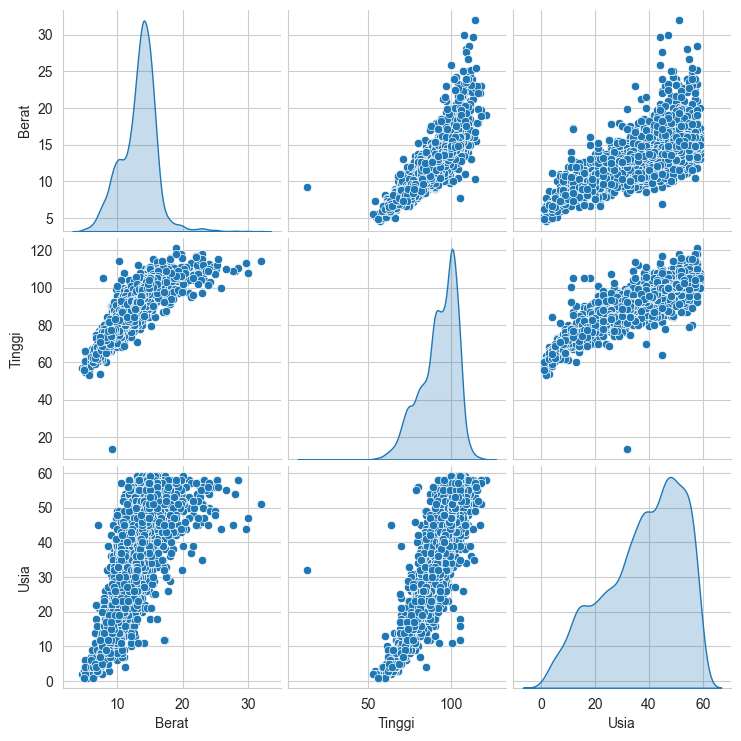

In [17]:
sns.pairplot(feature, vars=['Berat', 'Tinggi', 'Usia'], diag_kind='kde')

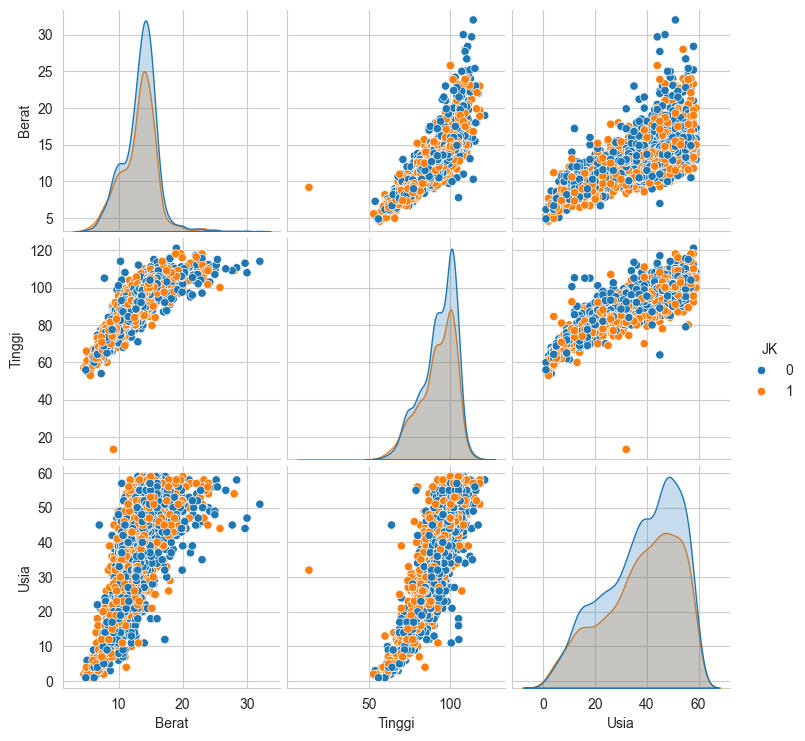

In [18]:
sns.pairplot(feature,hue='JK', vars = ['Berat','Tinggi','Usia'] )

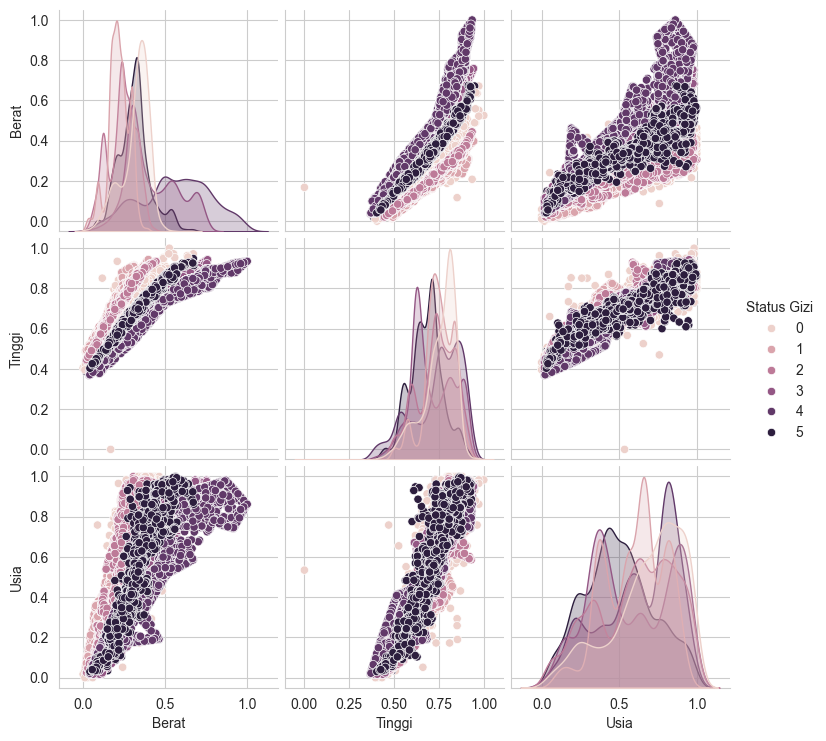

In [19]:
sns.pairplot(X_resampled, hue = 'Status Gizi',vars = ['Berat','Tinggi','Usia'] )

## Pemilihan Atribut (Feature Selection)


**Pengecekan korelasi antar keseluruhan atribut/variabel**

Korelasi Data Original

<Axes: >

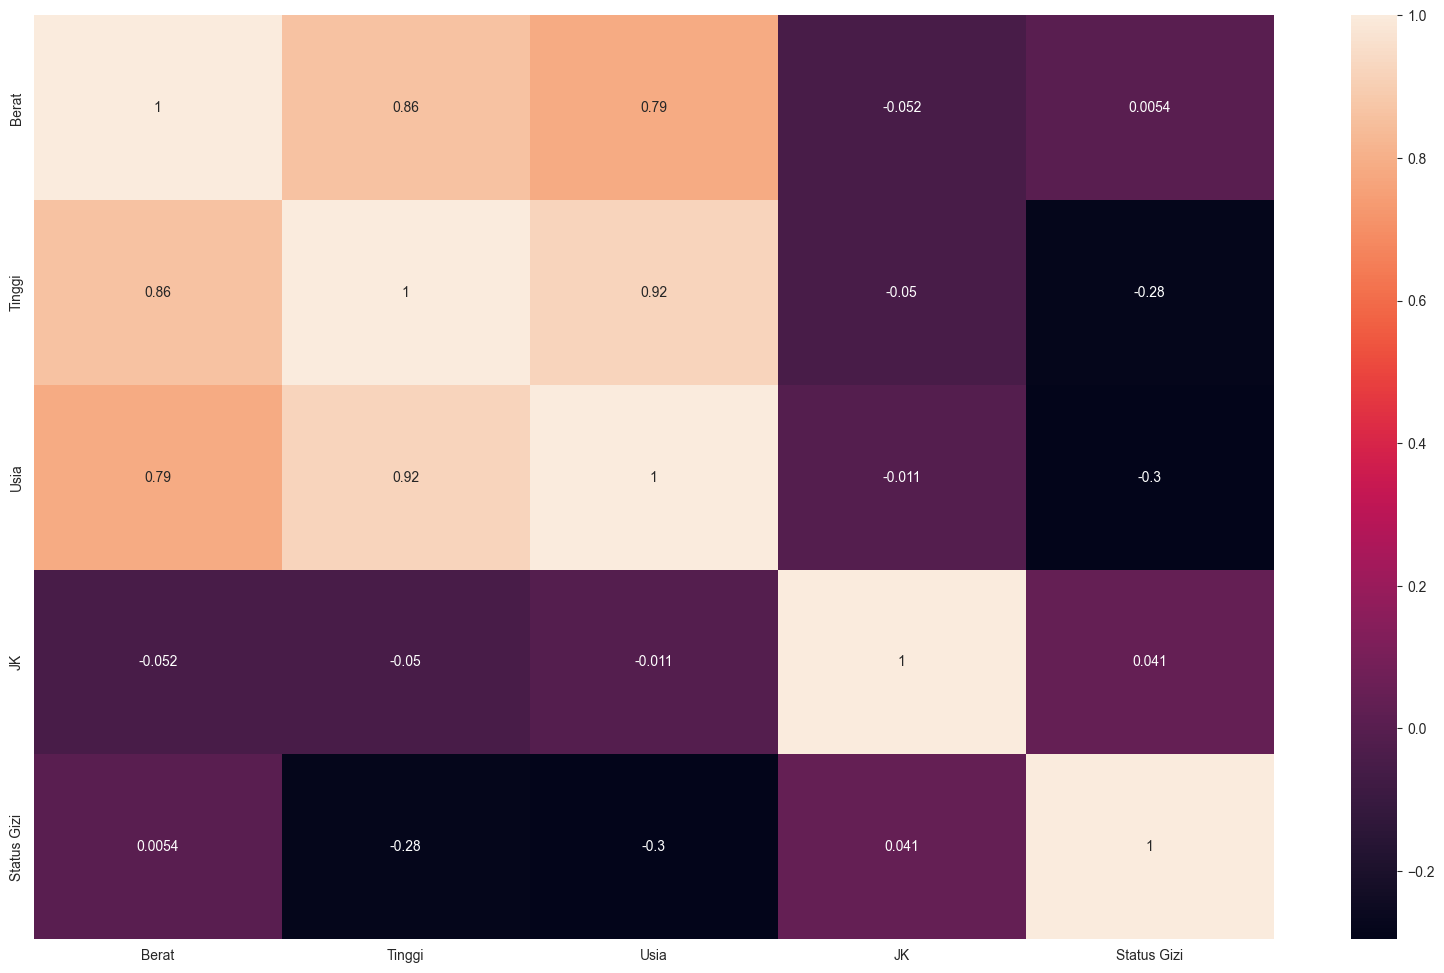

In [20]:
plt.figure(figsize=(20,12))
sns.heatmap(feature.corr(), annot=True)

Data Normalisasi & Kelas Seimbang

<Axes: >

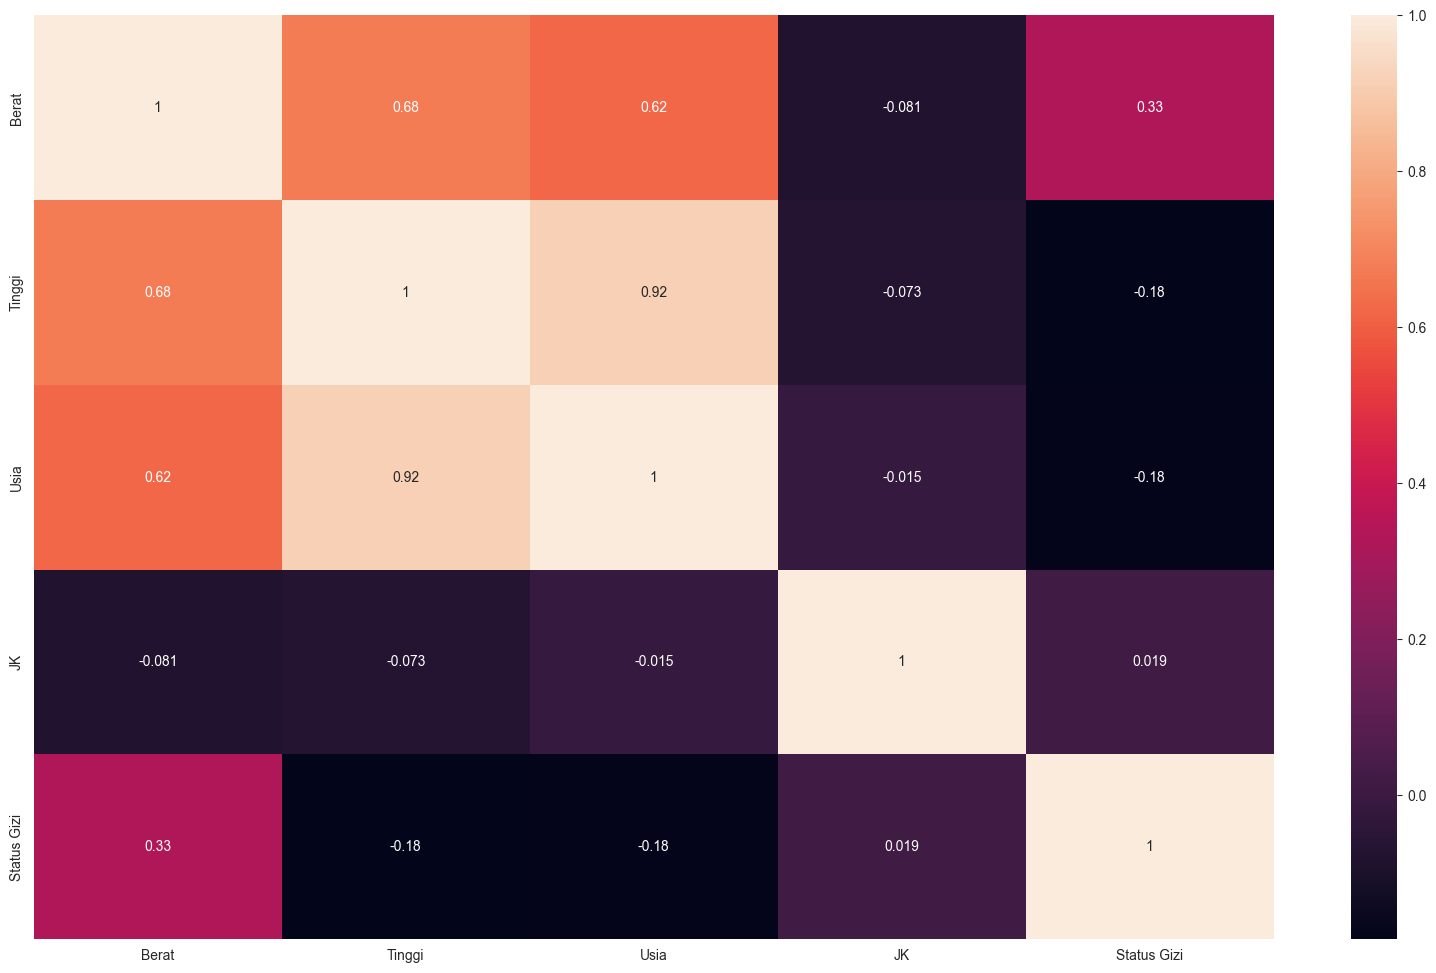

In [21]:
plt.figure(figsize=(20,12))
sns.heatmap(X_resampled.corr(), annot=True)

##Training Model

Membagi dataset menjadi data training dan data testing dengan perbandingan 80% data training dan 20% data testing. Pembagian data dilakukan secara random/acak.

* X_train berisi data training tanpa label/target
*y_train berisi label/target data training
*X_test berisi data testing tanpa label/target
*y_test berisi label/target data testing

In [22]:
X = feature[['Berat', 'Tinggi', 'Usia','JK']] #atribut
y = feature['Status Gizi'] #target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**MODEL TRAINING RANDOM FOREST CLASSIFIER**

In [23]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

**HASIL PREDIKSI DATA TESTING RANDOM FOREST CLASSIFIER**

In [24]:
y_pred = rfc.predict(X_test)
y_pred

array([0, 0, 0, 0, 3, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 5,
       0, 0, 0, 5, 0, 2, 0, 0, 5, 0, 0, 4, 0, 5, 0, 0, 0, 0, 5, 0, 5, 0,
       0, 0, 5, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 3, 0, 5, 0,
       0, 0, 0, 5, 0, 0, 0, 5, 1, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 2, 0, 5, 0, 5, 5, 0, 0,
       5, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 4, 0, 5, 0,
       0, 0, 0, 5, 0, 0, 0, 0, 2, 0, 5, 0, 0, 3, 5, 0, 0, 0, 0, 5, 0, 0,
       0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 5,
       2, 0, 0, 0, 5, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 5, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0,
       5, 5, 0, 5, 5, 5, 0, 5, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 5, 0, 0, 0, 0, 5, 3, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**TINGKAT KEAKURATAN DATA TESTING RANDOM FOREST CLASSIFIER**

In [25]:
print('Skor keakuratan data testing {0:0.4f}'.format(accuracy_score(y_test,y_pred)))


Skor keakuratan data testing 0.9347


**HASIL PREDIKSI DATA TRAINING RANDOM FOREST CLASSIFIER**

In [26]:
y_pred_train = rfc.predict(X_train)
y_pred_train

array([0, 0, 0, ..., 5, 0, 0])

**TINGKAT KEAKURATAN DATA TESTING RANDOM FOREST CLASSIFIER**

In [27]:
print('Skor keakuratan data training {0:0.4f}'.format(accuracy_score(y_train,y_train)))

Skor keakuratan data training 1.0000


##**Evaluation Random Forest Classifier**

In [28]:
y_pred = rfc.predict(X_test)

#Buat classification report
report = classification_report(y_test, y_pred)

#Cetak classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       731
           1       0.80      0.67      0.73        12
           2       0.85      0.74      0.79        38
           3       0.65      0.57      0.60        23
           4       1.00      0.58      0.74        12
           5       0.89      0.87      0.88       180

    accuracy                           0.93       996
   macro avg       0.86      0.73      0.78       996
weighted avg       0.93      0.93      0.93       996



**Menghitung Accuracy,Precision, Recall, dan F1-Score**

In [29]:
print("Accuracy score : {} ".format(accuracy_score(y_test, y_pred)))
print("Precison score : {} ".format(precision_score(y_test, y_pred, average='macro')))
print("Recall score : {} ".format(recall_score(y_test, y_pred, average='macro')))

Accuracy score : 0.9347389558232931 
Precison score : 0.8578839277307986 
Recall score : 0.7337183824268537 


**CONFUSION MATRIX**

In [30]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [31]:
cm = confusion_matrix(y_test, y_pred)
print('Hasil Confusion Matrix = \n', cm)
print('TP = ', cm[0,0])
print('TN = ', cm[1,1])
print('FP = ', cm[0,1])
print('FN = ', cm[1,0])

Hasil Confusion Matrix = 
 [[719   1   1   0   0  10]
 [  0   8   4   0   0   0]
 [  9   1  28   0   0   0]
 [  1   0   0  13   0   9]
 [  0   0   0   5   7   0]
 [ 22   0   0   2   0 156]]
TP =  719
TN =  8
FP =  1
FN =  0


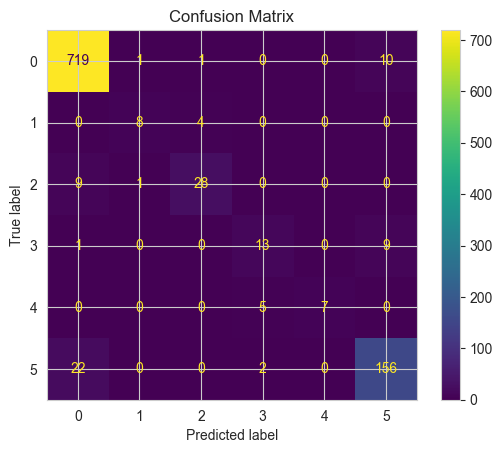

In [32]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

1. Membandingkan hasil prediksi data prediksi dengan data sebenarnya menggunakan fungsi **y_predRf = rfc.predict(X_test)**
2. Menghitung tingkat keakuratan data testing dengan menggunakan **accuracy_score**

In [33]:
y_predRf = rfc.predict(X_test)
print('1) Perbandingan Data Aktual dan Prediksi dengan Random Forest Classifier')
df = pd.DataFrame({'Actual':y_test, 'Predict':y_predRf})
print(df)
print('2) Skor keakuratan dengan Random Forest Classifier ',accuracy_score(y_test, y_predRf))

1) Perbandingan Data Aktual dan Prediksi dengan Random Forest Classifier
      Actual  Predict
3992       0        0
144        0        0
3062       0        0
4822       0        0
2574       4        3
...      ...      ...
4920       0        0
2157       0        0
1606       0        0
166        0        0
2486       0        0

[996 rows x 2 columns]
2) Skor keakuratan dengan Random Forest Classifier  0.9347389558232931


### **MENGEVALUASI KINERJA RANDOM FOREST CLASSIFIER**

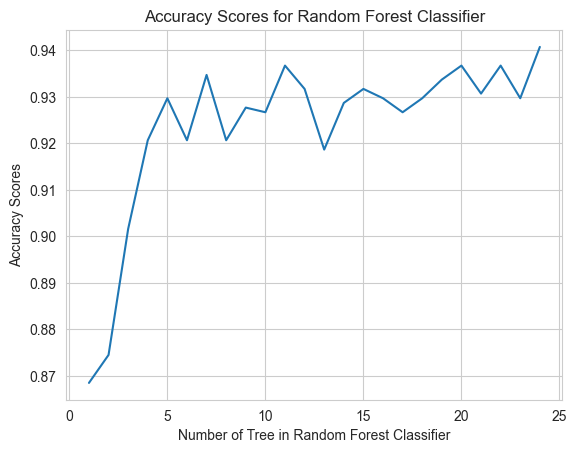

Accuracy Scores: [(1, 0.8684738955823293), (2, 0.8744979919678715), (3, 0.9016064257028112), (4, 0.9206827309236948), (5, 0.929718875502008), (6, 0.9206827309236948), (7, 0.9347389558232931), (8, 0.9206827309236948), (9, 0.927710843373494), (10, 0.9267068273092369), (11, 0.9367469879518072), (12, 0.9317269076305221), (13, 0.9186746987951807), (14, 0.928714859437751), (15, 0.9317269076305221), (16, 0.929718875502008), (17, 0.9267068273092369), (18, 0.929718875502008), (19, 0.9337349397590361), (20, 0.9367469879518072), (21, 0.9307228915662651), (22, 0.9367469879518072), (23, 0.929718875502008), (24, 0.9407630522088354)]
Highest Accuracy: 0.9407630522088354


In [34]:
n_tree_range = list(range(1, 25))
scores = []

for n_tree in n_tree_range:
  rfc = RandomForestClassifier(n_estimators=n_tree)
  rfc.fit(X_train, y_train)
  y_predRf = rfc.predict(X_test)
  scores.append(accuracy_score(y_test, y_predRf))

plt.plot(n_tree_range, scores)
plt.xlabel('Number of Tree in Random Forest Classifier')
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Scores for Random Forest Classifier')
plt.show()

scores_list = list(zip(n_tree_range, scores))

print('Accuracy Scores:', scores_list)
print('Highest Accuracy:', max(scores))

**MODEL TRAINING DECISION TREE CLASSIFIER**

In [35]:
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

**HASIL PREDIKSI DATA TESTING DECISION TREE CLASSIFIER**

In [36]:
y_pred = tree.predict(X_test)
y_pred

array([0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5,
       0, 0, 0, 5, 0, 2, 0, 0, 5, 0, 0, 4, 0, 5, 0, 0, 0, 0, 5, 0, 5, 0,
       0, 0, 5, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 3, 0, 5, 0,
       0, 0, 0, 5, 0, 0, 0, 5, 1, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0,
       5, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 4, 0, 5, 0,
       0, 0, 0, 5, 0, 0, 0, 0, 2, 5, 3, 0, 0, 5, 5, 0, 0, 0, 0, 5, 0, 0,
       0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 5,
       0, 0, 0, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 5, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0,
       5, 5, 0, 5, 5, 5, 5, 5, 0, 0, 2, 0, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 5, 0, 0, 0, 0, 5, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0,

**TINGKAT KEAKURATAN DATA TESTING DECISION TREE CLASSIFIER**

In [37]:
print('Skor keakuratan data testing {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

Skor keakuratan data testing 0.9147


**HASIL PREDIKSI DATA TRAINING DECISION TREE CLASSIFIER**

In [38]:
y_pred_train = tree.predict(X_train)
y_pred_train

array([0, 0, 0, ..., 5, 0, 0])

**TINGKAT KEAKURATAN DATA TRAINING DECISION TREE CLASSIFIER**

In [39]:
print('Skor keakuratan data training {0:0.4f}'.format(accuracy_score(y_train,y_train)))

Skor keakuratan data training 1.0000


##**Evaluation Decision Tree Classifier**

In [40]:
y_pred = tree.predict(X_test)

#Buat classification report
report = classification_report(y_test, y_pred)

#Cetak classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       731
           1       0.70      0.58      0.64        12
           2       0.69      0.71      0.70        38
           3       0.48      0.43      0.45        23
           4       1.00      0.58      0.74        12
           5       0.85      0.85      0.85       180

    accuracy                           0.91       996
   macro avg       0.78      0.69      0.72       996
weighted avg       0.91      0.91      0.91       996



**Menghitung Accuracy,Precision, Recall, dan F1-Score**

In [41]:
print("Accuracy score : {} ".format(accuracy_score(y_test, y_pred)))
print("Precison score : {} ".format(precision_score(y_test, y_pred, average='macro')))
print("Recall score : {} ".format(recall_score(y_test, y_pred, average='macro')))

Accuracy score : 0.9146586345381527 
Precison score : 0.7797753628759215 
Recall score : 0.6881906423009486 


**CONFUSION MATRIX**

In [42]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [43]:
cm = confusion_matrix(y_test, y_pred)
print('Hasil Confusion Matrix = \n', cm)
print('TP = ', cm[0,0])
print('TN = ', cm[1,1])
print('FP = ', cm[0,1])
print('FN = ', cm[1,0])

Hasil Confusion Matrix = 
 [[707   1   8   0   0  15]
 [  1   7   4   0   0   0]
 [  9   2  27   0   0   0]
 [  2   0   0  10   0  11]
 [  1   0   0   4   7   0]
 [ 20   0   0   7   0 153]]
TP =  707
TN =  7
FP =  1
FN =  1


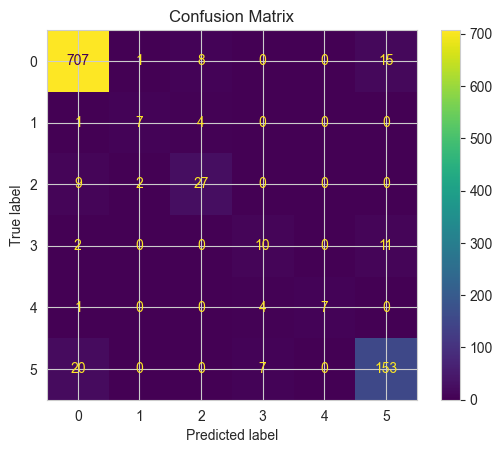

In [44]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

1. Membandingkan hasil prediksi data prediksi dengan data sebenarnya menggunakan fungsi **y_predTree = tree.predict(X_test)**
2. Menghitung tingkat keakuratan data testing dengan menggunakan **accuracy_scor

In [45]:
y_predTree = tree.predict(X_test)
print('1) Perbandingan Data Aktual dan Prediksi dengan Decision Tree Classifier')
df = pd.DataFrame({'Actual':y_test, 'Predict':y_predTree})
print(df)
print('2) Skor keakuratan dengan Decision Tree Classifier ',accuracy_score(y_test, y_predTree))

1) Perbandingan Data Aktual dan Prediksi dengan Decision Tree Classifier
      Actual  Predict
3992       0        0
144        0        0
3062       0        0
4822       0        0
2574       4        3
...      ...      ...
4920       0        0
2157       0        0
1606       0        0
166        0        0
2486       0        0

[996 rows x 2 columns]
2) Skor keakuratan dengan Decision Tree Classifier  0.9146586345381527


### **MENGEVALUASI KINERJA DECISION TREE CLASSIFIER**

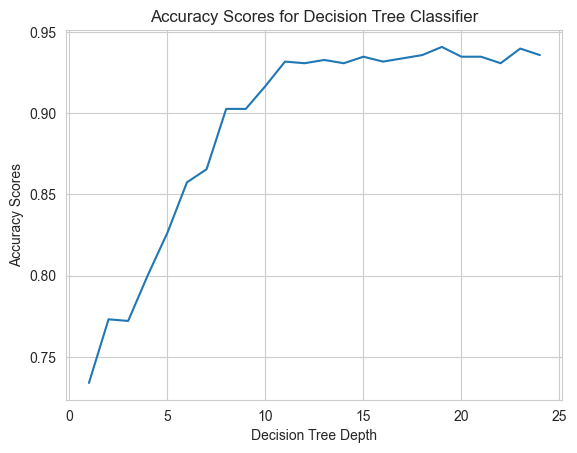

Accuracy Scores: [(1, 0.7339357429718876), (2, 0.7730923694779116), (3, 0.7720883534136547), (4, 0.8002008032128514), (5, 0.8263052208835341), (6, 0.857429718875502), (7, 0.8654618473895582), (8, 0.9026104417670683), (9, 0.9026104417670683), (10, 0.9166666666666666), (11, 0.9317269076305221), (12, 0.9307228915662651), (13, 0.9327309236947792), (14, 0.9307228915662651), (15, 0.9347389558232931), (16, 0.9317269076305221), (17, 0.9337349397590361), (18, 0.9357429718875502), (19, 0.9407630522088354), (20, 0.9347389558232931), (21, 0.9347389558232931), (22, 0.9307228915662651), (23, 0.9397590361445783), (24, 0.9357429718875502)]
Highest Accuracy: 0.9407630522088354


In [46]:
depth_range = list(range(1, 25))
scores = []

for depth in depth_range:
  tree = DecisionTreeClassifier(max_depth=depth)
  tree.fit(X_train, y_train)
  y_predTree = tree.predict(X_test)
  scores.append(accuracy_score(y_test, y_predTree))

plt.plot(depth_range, scores)
plt.xlabel('Decision Tree Depth')
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Scores for Decision Tree Classifier')
plt.show()

scores_list = list(zip(depth_range, scores))

print('Accuracy Scores:', scores_list)
print('Highest Accuracy:', max(scores))

## Pemilihan Parameter Model dengan **GridSearch**

Pencarian parameter model yang tepat (seperti nilai C atau gamma yang digunakan) merupakan tugas yang rumit. Tetapi untungnya, Scikit-learn memiliki fungsionalitas untuk mencoba banyak kombinasi dan melihat mana yang paling berhasil, yang disebut dengan Grid Search Cross Validation (GridSearchCV).

**GridSearchCV membuat sebuah dictionary kumpulan pasangan parameter yang harus dicoba pada model.**

Kita tinggal memasukkan daftar nilai parameter model yang perlu dicoba. Misalnya untuk Random Forest ini kita akan memvariasikan nilai parameter C, gamma, serta jenis kernelnya.

In [47]:
param_grid_rfc= {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [48]:
from sklearn.model_selection import GridSearchCV

### ***GRID SEACRH RANDOM FOREST CLASSIFER***

In [49]:
grid = GridSearchCV(RandomForestClassifier(),param_grid_rfc,refit=True,verbose=0)

GridSearchCV akan menjalankan perulangan yang sama dengan teknik cross validation untuk menemukan kombinasi parameter terbaik. Setelah memiliki kombinasi terbaik, lalu dilakukan running pada semua data latih untuk membangun satu model baru menggunakan pengaturan kombinasi parameter terbaik.

In [50]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

**Kita bisa memeriksa kombinasi parameter terbaik yang ditemukan oleh GridSearchCV di best\_params\_ attribute, dan model klasifikasi terbaik di best\_estimator\_ attribute**

In [51]:
grid.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

##**Evaluation GridSearch RFC**

In [52]:
y_grid_predictions = grid.predict(X_test)

In [53]:
print(classification_report(y_test,y_grid_predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       731
           1       0.62      0.42      0.50        12
           2       0.76      0.68      0.72        38
           3       0.67      0.52      0.59        23
           4       1.00      0.50      0.67        12
           5       0.89      0.91      0.90       180

    accuracy                           0.93       996
   macro avg       0.82      0.67      0.72       996
weighted avg       0.93      0.93      0.93       996



**Menghitung Accuracy,Precision, Recall, dan F1-Score**

In [54]:
print("Accuracy score : {} ".format(accuracy_score(y_test, y_grid_predictions)))
print("Precison score : {} ".format(precision_score(y_test, y_grid_predictions, average='macro')))
print("Recall score : {} ".format(recall_score(y_test, y_grid_predictions, average='macro')))

Accuracy score : 0.9347389558232931 
Precison score : 0.8176748474577304 
Recall score : 0.668626001716624 


**Confusion Matrix GridSearch**

In [55]:
cm = confusion_matrix(y_test, y_grid_predictions)
print('Hasil Confusion Matrix = \n', cm)
print('TP = ', cm[0,0])
print('TN = ', cm[1,1])
print('FP = ', cm[0,1])
print('FN = ', cm[1,0])

Hasil Confusion Matrix = 
 [[719   1   1   0   0  10]
 [  0   5   7   0   0   0]
 [ 10   2  26   0   0   0]
 [  0   0   0  12   0  11]
 [  0   0   0   6   6   0]
 [ 17   0   0   0   0 163]]
TP =  719
TN =  5
FP =  1
FN =  0


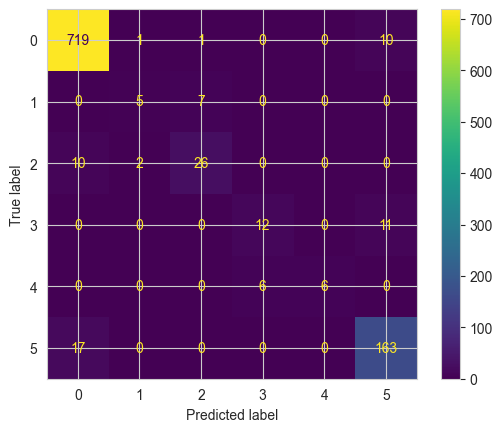

In [56]:
cm = confusion_matrix(y_test, y_grid_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [57]:
y_pred_gridRf = grid.predict(X_test)
print('1) Perbandingan Data Aktual dan Prediksi dengan Random Forest Classifier')
df = pd.DataFrame({'Actual':y_test, 'Predict':y_pred_gridRf})
print(df)
print('2) Skor keakuratan dengan Random Forest Classifier ',accuracy_score(y_test, y_pred_gridRf))

1) Perbandingan Data Aktual dan Prediksi dengan Random Forest Classifier
      Actual  Predict
3992       0        0
144        0        0
3062       0        0
4822       0        0
2574       4        3
...      ...      ...
4920       0        0
2157       0        0
1606       0        0
166        0        0
2486       0        0

[996 rows x 2 columns]
2) Skor keakuratan dengan Random Forest Classifier  0.9347389558232931


### **Mengevaluasi Kinerja GridSearch**

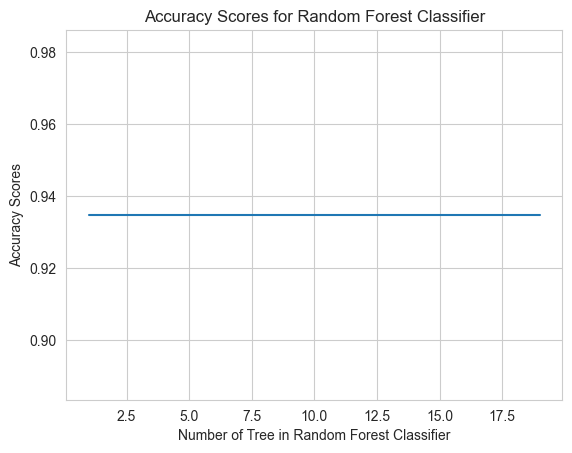

Accuracy Scores: [(1, 0.9347389558232931), (2, 0.9347389558232931), (3, 0.9347389558232931), (4, 0.9347389558232931), (5, 0.9347389558232931), (6, 0.9347389558232931), (7, 0.9347389558232931), (8, 0.9347389558232931), (9, 0.9347389558232931), (10, 0.9347389558232931), (11, 0.9347389558232931), (12, 0.9347389558232931), (13, 0.9347389558232931), (14, 0.9347389558232931), (15, 0.9347389558232931), (16, 0.9347389558232931), (17, 0.9347389558232931), (18, 0.9347389558232931), (19, 0.9347389558232931)]
Highest Accuracy: 0.9347389558232931


In [58]:
n_tree_range = list(range(1, 20))
scores = []

for n_tree in n_tree_range:
  rfc = RandomForestClassifier(n_estimators=n_tree)
  rfc.fit(X_train, y_train)
  y_pred_gridRf = grid.predict(X_test)
  scores.append(accuracy_score(y_test, y_pred_gridRf))

plt.plot(n_tree_range, scores)
plt.xlabel('Number of Tree in Random Forest Classifier')
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Scores for Random Forest Classifier')
plt.show()

scores_list = list(zip(n_tree_range, scores))

print('Accuracy Scores:', scores_list)
print('Highest Accuracy:', max(scores))

### ***GRID SEACRH DECISION TREE CLASSIFER***

In [59]:
param_grid_tree= {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
grid = GridSearchCV(DecisionTreeClassifier(),param_grid_tree,refit=True,verbose=0)

In [62]:
# Proses ini bisa memakan waktu yang lama, tergantung dari ukuran data dan banyaknya kombinasi parameter model
grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [63]:
grid.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

##**Evaluation GridSearch DT**

In [64]:
tree_grid_predictions = grid.predict(X_test)

In [65]:
print(classification_report(y_test,tree_grid_predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       731
           1       0.67      0.67      0.67        12
           2       0.73      0.84      0.78        38
           3       0.61      0.74      0.67        23
           4       1.00      0.67      0.80        12
           5       0.91      0.88      0.90       180

    accuracy                           0.94       996
   macro avg       0.81      0.80      0.80       996
weighted avg       0.94      0.94      0.94       996



**Menghitung Accuracy,Precision, Recall, dan F1-Score**

In [66]:
print("Accuracy score : {} ".format(accuracy_score(y_test, tree_grid_predictions)))
print("Precison score : {} ".format(precision_score(y_test, tree_grid_predictions, average='macro')))
print("Recall score : {} ".format(recall_score(y_test, tree_grid_predictions, average='macro')))

Accuracy score : 0.9387550200803213 
Precison score : 0.8141603869381647 
Recall score : 0.7950904305809031 


**Confusion Matrix GridSearch**

In [67]:
cm = confusion_matrix(y_test, tree_grid_predictions)
print('Hasil Confusion Matrix = \n', cm)
print('TP = ', cm[0,0])
print('TN = ', cm[1,1])
print('FP = ', cm[0,1])
print('FN = ', cm[1,0])

Hasil Confusion Matrix = 
 [[711   2   8   0   0  10]
 [  0   8   4   0   0   0]
 [  4   2  32   0   0   0]
 [  0   0   0  17   0   6]
 [  0   0   0   4   8   0]
 [ 14   0   0   7   0 159]]
TP =  711
TN =  8
FP =  2
FN =  0


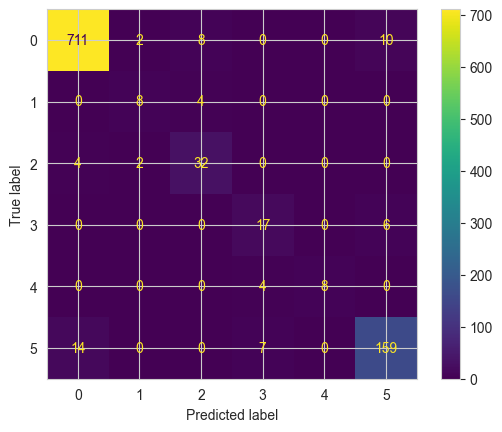

In [68]:
cm = confusion_matrix(y_test, tree_grid_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [69]:
y_pred_gridTree = grid.predict(X_test)
print('1) Perbandingan Data Aktual dan Prediksi dengan Random Forest Classifier')
df = pd.DataFrame({'Actual':y_test, 'Predict':y_pred_gridTree})
print(df)
print('2) Skor keakuratan dengan Random Forest Classifier ',accuracy_score(y_test, y_pred_gridTree))

1) Perbandingan Data Aktual dan Prediksi dengan Random Forest Classifier
      Actual  Predict
3992       0        0
144        0        0
3062       0        0
4822       0        0
2574       4        3
...      ...      ...
4920       0        0
2157       0        0
1606       0        0
166        0        0
2486       0        0

[996 rows x 2 columns]
2) Skor keakuratan dengan Random Forest Classifier  0.9387550200803213


### **Mengevaluasi Kinerja GridSearch**

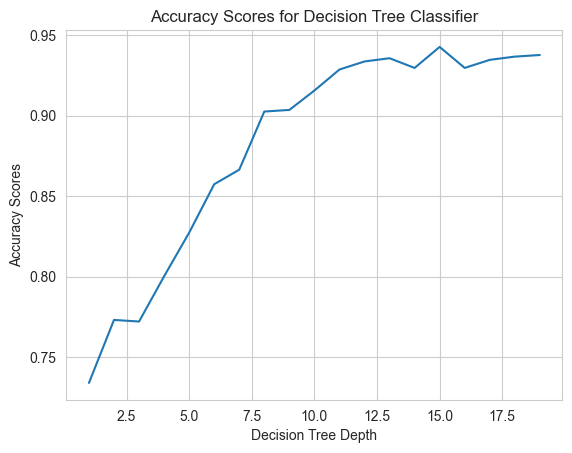

Accuracy Scores: [(1, 0.7339357429718876), (2, 0.7730923694779116), (3, 0.7720883534136547), (4, 0.8002008032128514), (5, 0.8273092369477911), (6, 0.857429718875502), (7, 0.8664658634538153), (8, 0.9026104417670683), (9, 0.9036144578313253), (10, 0.9156626506024096), (11, 0.928714859437751), (12, 0.9337349397590361), (13, 0.9357429718875502), (14, 0.929718875502008), (15, 0.9427710843373494), (16, 0.929718875502008), (17, 0.9347389558232931), (18, 0.9367469879518072), (19, 0.9377510040160643)]
Highest Accuracy: 0.9427710843373494


In [70]:
depth_range = list(range(1, 20))
scores = []

for depth in depth_range:
  tree = DecisionTreeClassifier(max_depth=depth)
  tree.fit(X_train, y_train)
  y_pred_gridTree = tree.predict(X_test)
  scores.append(accuracy_score(y_test, y_pred_gridTree))

plt.plot(depth_range, scores)
plt.xlabel('Decision Tree Depth')
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Scores for Decision Tree Classifier')
plt.show()

scores_list = list(zip(depth_range, scores))

print('Accuracy Scores:', scores_list)
print('Highest Accuracy:', max(scores))